# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [171]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [146]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [147]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/vanditnarula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


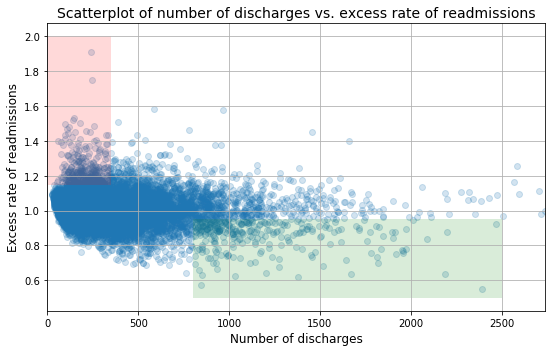

In [148]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [149]:
# Your turn

In [150]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [151]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [152]:
col_keep = ['Number of Discharges', 'Excess Readmission Ratio']
df = hospital_read_df.loc[:,col_keep]
df

,Number of Discharges,Excess Readmission Ratio
0,242,1.9095
1,247,1.7521
2,586,1.5836
3,965,1.5760
4,149,1.5308
5,141,1.5189
6,390,1.5079
7,178,1.5019
8,98,1.4953
9,256,1.4844


In [153]:
df = df.dropna()  #drop NaN
df


,Number of Discharges,Excess Readmission Ratio
0,242,1.9095
1,247,1.7521
2,586,1.5836
3,965,1.5760
4,149,1.5308
5,141,1.5189
6,390,1.5079
7,178,1.5019
8,98,1.4953
9,256,1.4844


In [154]:
df = df[df['Number of Discharges'] != 'Not Available']
#drop 'Not Available'

In [155]:
df.info() #want to convert number of discharges to int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null object
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), object(1)
memory usage: 269.5+ KB


In [156]:
df['Number of Discharges'] = df['Number of Discharges'].astype(int)

/Users/vanditnarula/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
df.head(30)

,Number of Discharges,Excess Readmission Ratio
0,242,1.9095
1,247,1.7521
2,586,1.5836
3,965,1.5760
4,149,1.5308
5,141,1.5189
6,390,1.5079
7,178,1.5019
8,98,1.4953
9,256,1.4844


In [158]:
no_discharges = df['Number of Discharges']
readmin_ratio = df['Excess Readmission Ratio']

/Users/vanditnarula/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Discharge vs Excess Readmission Ratio')

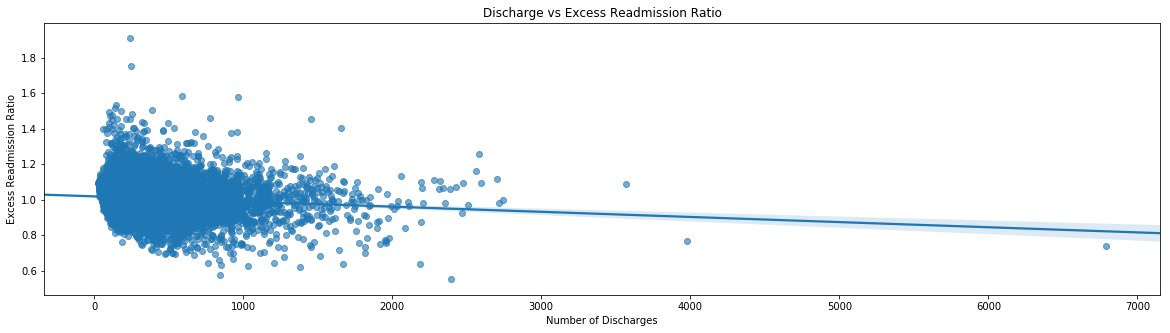

In [164]:
plt.figure(figsize=(20,5))
plt.scatter(no_discharges, readmin_ratio,alpha = 0.2)
sns.regplot(x=no_discharges, y=readmin_ratio, data=df, scatter_kws={'alpha':0.5})

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Discharge vs Excess Readmission Ratio')

#0-1000 is a little cluttered would need a seperate plot

In [165]:
#Rate of readmissions is trending down with increasing number of discharges

test1 = np.corrcoef(no_discharges, readmin_ratio)
print(test1[0,1])

#we can see a slight negative correlation so correct

-0.09739794351079355


Text(0.5,1,'Discharge vs Excess Readmission Ratio')

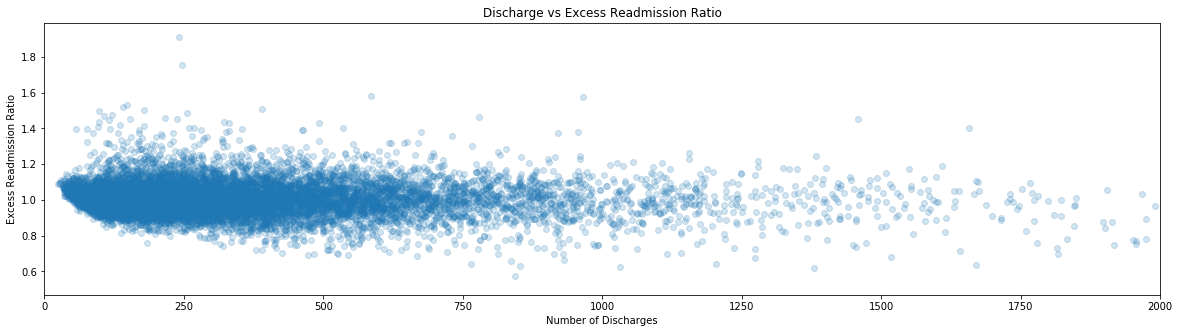

In [160]:
#With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

plt.figure(figsize=(20,5))
plt.scatter(no_discharges, readmin_ratio,alpha = 0.2)
plt.xlim(0,2000)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Discharge vs Excess Readmission Ratio')


Text(0.5,1,'Discharge vs Excess Readmission Ratio')

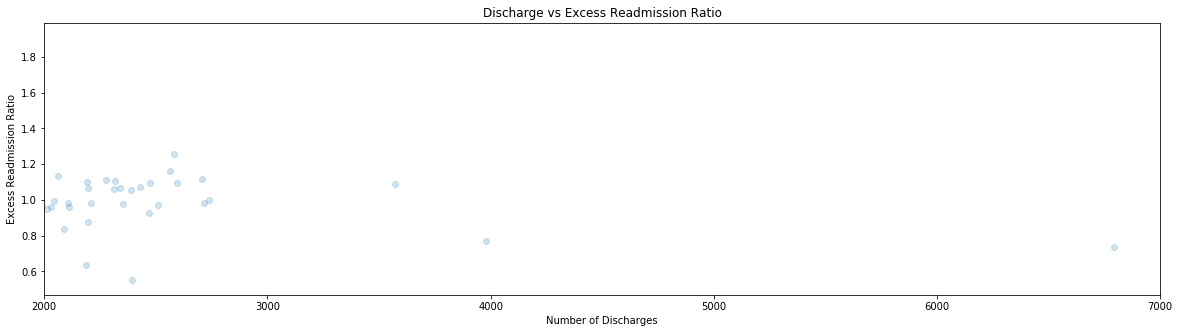

In [114]:
plt.figure(figsize=(20,5))
plt.scatter(no_discharges, readmin_ratio,alpha = 0.2)
plt.xlim(2000,7000)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Discharge vs Excess Readmission Ratio')

In [115]:
# can be seen that the with a high increase 
#in number of discharges there is a greater incidience of lower rate of incidience

In [133]:
#In hospitals/facilities with number of discharges < 100, 
#mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

low_discharge = df[df['Number of Discharges'] < 100]
print(low_discharge.mean())

lowd_greater1 = low_discharge[low_discharge['Excess Readmission Ratio'] > 1].count()
print(lowd_greater1[0]/(low_discharge.count()))

#Therefore correct 

Number of Discharges        74.717172
Excess Readmission Ratio     1.022618
dtype: float64
Number of Discharges        0.632155
Excess Readmission Ratio    0.632155
dtype: float64


In [136]:
#In hospitals/facilities with number of discharges > 1000, 
#mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

high_discharge = df[df['Number of Discharges'] > 1000]
print(high_discharge.mean())

highd_greater1 = high_discharge[high_discharge['Excess Readmission Ratio'] > 1].count()
print(highd_greater1[0]/(high_discharge.count()))


#all correct

Number of Discharges        1383.427646
Excess Readmission Ratio       0.978335
dtype: float64
Number of Discharges        0.444924
Excess Readmission Ratio    0.444924
dtype: float64


In [137]:
#There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

In [138]:
#Using Frequentist Statistics

In [140]:
#Hypothesis Testing
# Ho: p = 0
# Ha: p != 0 

In [175]:
r = test1[0][1]
n = len(df['Number of Discharges'])

t_stat = r * np.sqrt(n-2)/np.sqrt(1-r**2)
p = p_value = stats.t.cdf(x=t_stat, df = n-2) * 2
print(t_stat)
print(p)

#reject Ho

-10.492380813423361
1.2225473776734135e-25


In [176]:
#Bootstrap

In [181]:
obs_r, obs_p_value = stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])

bs_r = np.empty(10000) 
bs_p = np.empty(10000)

# generate pairs bootstrap samples
for i in range(10000):
    idx = np.random.choice(range(n), n)
    bs_r[i], bs_p[i] = stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])
    
bs_rmean = np.mean(bs_r)
bs_pmean = np.mean(bs_p)


print('The p value is %d' %bs_pmean)
print(bs_rmean)
    
    

The p value is 0
-0.09739794351079352


In [ ]:
#Again null hypothesis can be rejected and we can say that the there is a slight correlation. 
#We can see that there is a slight negative correlation meaning when discharges go up the readmission ratio goes down slightly

#### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

#### The statistical significance is that there is a -0.097 correlation that an increase in discharges results in increase
#readmission ratio. With the mean readmission ratio of 1.022618 of small hospitals and 0.978335 for big hospitals.
#Since the correlation is really small and the means also very close to each other
#it doesn't make much sense to consolidate smaller hospitals into bigger hospitals or spend money on upgrades
#as return for value really isn't there and will be more costly than just continuing on the current path.


#### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

In [183]:
#The advantages of the given plot is that it allows you to quickly isolate and test the problem that you are looking for
#However, it doesn't really give you indication about how the data is related and the p value

/Users/vanditnarula/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


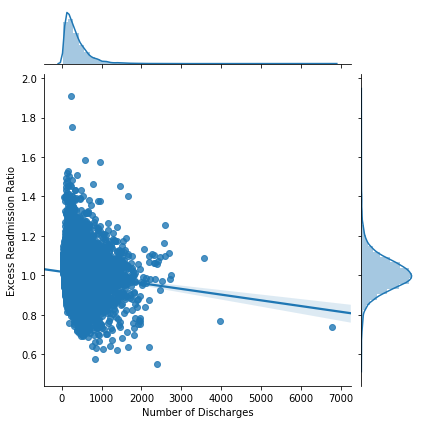

In [185]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind = 'reg')